# Importing subjectCode Dictionary

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("subjectCode.txt","rb") as f:
    dict_name = pickle.load(f)

In [3]:
dict_name

{'IS/biz': {'description': 'Business and Commerce',
  'parent': None,
  'level': 0},
 'IS/biz.awards': {'description': 'Business Awards',
  'parent': 'IS/lifesoc.awards',
  'level': 2},
 'IS/biz.crime': {'description': 'Business Crime',
  'parent': 'IS/impact.crime',
  'level': 2},
 'IS/biz.kickback': {'description': 'Bribery and Kickbacks',
  'parent': 'IS/biz.crime',
  'level': 3},
 'IS/biz.fraud': {'description': 'Fraud',
  'parent': 'IS/biz.crime',
  'level': 3},
 'IS/biz.insfraud': {'description': 'Insurance Fraud',
  'parent': 'IS/biz.fraud',
  'level': 4},
 'IS/biz.invfraud': {'description': 'Investment Fraud',
  'parent': 'IS/biz.fraud',
  'level': 4},
 'IS/biz.insider': {'description': 'Illegal Insider Trading',
  'parent': 'IS/biz.invfraud',
  'level': 5},
 'IS/biz.ponzi': {'description': 'Ponzi Schemes',
  'parent': 'IS/biz.invfraud',
  'level': 5},
 'IS/biz.pyramid': {'description': 'Pyramid Schemes',
  'parent': 'IS/biz.invfraud',
  'level': 5},
 'IS/biz.indspy': {'descrip

# Loading Discovery Instance

In [4]:
__author__="Jayesh"
import json
import os
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../modules/")
import modules.common_helper as cm_help
from ibm_watson import DiscoveryV1
import modules.config as config
import modules.discovery_helper as dh
import os
import time
from pprint import pprint
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [5]:
all_params = cm_help.get_params()
COLLECTION_NAME = config.DISCOVERY_COLLECTION_NAME
print(COLLECTION_NAME)

Naviga1


In [6]:
all_params['discovery']

{'default': 'naviga',
 'r3': {'version': 'YOUR-VERSION', 'apikey': 'YOUR-API', 'url': 'YOUR-URL'},
 'a1': {'version': '2019-04-30',
  'apikey': 'h1IoNg4AIKbGtBs8n8QGf4dZ5tZwMpeVERQUrC1Q2-DF',
  'url': 'https://api.jp-tok.discovery.watson.cloud.ibm.com/instances/2330122b-7269-496b-ba7e-029f641470a1'},
 'naviga': {'version': '2019-04-30',
  'apikey': 'e60nrAsq6WIQmWfuzv9_8by2yCXinHK_FOe3u9MSI1ml',
  'url': 'https://api.us-east.discovery.watson.cloud.ibm.com/instances/f2df1dc1-c923-49c1-80f3-7e23fc0441e8'},
 'version1': '2018-12-03',
 'apikey1': 'LTk2AGh0Mjsu3G9bGGSkU92xeCBAYdfa4lN4fjaA-CR4',
 'url1': 'https://gateway.watsonplatform.net/discovery/api'}

In [7]:
def discovery_init(COLLECTION_NAME=config.DISCOVERY_COLLECTION_NAME,default=all_params['discovery']['default']):
    response = {}
    
    discovery_param = all_params['discovery']
    # default = 
    authenticator = IAMAuthenticator(apikey=discovery_param[default]['apikey'])
    endurl = "https://gateway.watsonplatform.net/discovery/api"
    discovery = DiscoveryV1(
        version=discovery_param[default]['version'],
        authenticator = authenticator)
    iam_apikey=discovery_param[default]['apikey'],
    url=discovery_param[default]['url']    
    if default =="naviga":
        discovery.set_service_url(discovery_param[default]['url'])

    environments = discovery.list_environments().get_result()
    # print(json.dumps(environments, indent=2))
    print("Discovery instance loaded "+default)
    js = json.dumps(environments)
    jres = json.loads(js)
    # print(jres['environments'][1]['environment_id'])
    env_id = jres['environments'][1]['environment_id']
    collections = discovery.list_collections(env_id).get_result()
    cols = json.dumps(collections, indent=2)
    colres = json.loads(cols)

    #print(colres['collections'])
    for item in colres['collections']:
        if item['name']== COLLECTION_NAME:
            print('COLLECTION ID:', item['collection_id'], 'COLLECTION NAME:', item['name'])
            col_id = item['collection_id']
    response['env_id'] = env_id
    response['col_id'] = col_id
    response['discovery'] = discovery
    return response

In [8]:
discovery_config = discovery_init(COLLECTION_NAME,default="naviga")

Discovery instance loaded naviga
COLLECTION ID: ec586f27-f848-40b7-99af-dab80a43b248 COLLECTION NAME: Naviga1


# Getting all subjectCode

In [9]:
offset = 0
count = 99
reqparams = {'offset':offset,'count':count}
reqparams['aggr'] = 'term(subjectCode,count:216270)'
discovery_data_subCode = dh.getDiscoveryData(discovery_config,reqparams)

offset in query0


In [10]:
sub_list=discovery_data_subCode['aggregations'][0]["results"]

In [11]:
len(sub_list)

216270

In [12]:
df=pd.DataFrame(sub_list)

In [13]:
df.head()

,key,matching_results
0,MC/BIZREL#1,130034
1,MC/IMPACT#1,117571
2,NZ/COID#6#50#60,114328
3,NE/GEONAMR#7#50#72,94594
4,NE/GEOAMER#6#50#64,94106


In [16]:
df_final=df["key"].str.split(r"/|#",expand=True)

In [17]:
df_final["Total"]=df["matching_results"]

In [18]:
df_final.head()

,0,1,2,3,4,Total
0,MC,BIZREL,1,None,None,130034
1,MC,IMPACT,1,None,None,117571
2,NZ,COID,6,50,60,114328
3,NE,GEONAMR,7,50,72,94594
4,NE,GEOAMER,6,50,64,94106


In [19]:
df_final.rename(columns={0:"Code",2:"Relevance",1:"term"},inplace=True)

In [20]:
df_final.head()

,Code,term,Relevance,3,4,Total
0,MC,BIZREL,1,None,None,130034
1,MC,IMPACT,1,None,None,117571
2,NZ,COID,6,50,60,114328
3,NE,GEONAMR,7,50,72,94594
4,NE,GEOAMER,6,50,64,94106


# Filtering where code is 'IS'

In [21]:
df_IS=df_final.where(df_final["Code"]=="IS")

In [22]:
df_IS.dropna(inplace=True)

In [23]:
df_IS.drop([3,4],axis=1,inplace=True)

In [24]:
df_IS.head()

,Code,term,Relevance,Total
32,IS,lifesoc,9,27823.0
42,IS,pol,9,24584.0
48,IS,haw,9,21887.0
51,IS,haw.disease,9,20565.0
54,IS,haw.covid19,9,20419.0


In [25]:
df_IS.shape

(38161, 4)

# Filtering where relevance >6

In [26]:
df_IS["Relevance"]=df_IS["Relevance"].astype("int")

In [27]:
df_IS.where(df_IS["Relevance"]>6,inplace=True)
df_IS.dropna(inplace=True)

In [28]:
df_IS.head()

,Code,term,Relevance,Total
32,IS,lifesoc,9.0,27823.0
42,IS,pol,9.0,24584.0
48,IS,haw,9.0,21887.0
51,IS,haw.disease,9.0,20565.0
54,IS,haw.covid19,9.0,20419.0


In [29]:
df_IS.shape

(27600, 4)

In [30]:
df_IS["Relevance"].unique()

array([9., 7., 8.])

In [31]:
df_plot=df_IS.groupby(df_IS["term"]).sum()

In [32]:
df_plot.drop("Relevance",axis=1,inplace=True)

In [33]:
df_plot.sort_values("Total",ascending=False,inplace=True)

In [34]:
df_plot.head()

,Total
term,
lifesoc,53328.0
pol,40830.0
haw,37774.0
spec,36833.0
haw.disease,34098.0


In [35]:
df_plot.shape

(1597, 1)

# Visualization

In [37]:
x=df_plot.index.values

In [40]:
len(x)

1597

In [63]:
x_desc=[]
for i in range(1597):
    try:
        x_desc.append(dict_name["IS/"+x[i]]["description"])
    except:
        x_desc.append(x)
        print(i)

1244
1310
1352
1477
1505
1506
1596


In [65]:
y=df_plot["Total"]

In [66]:
len(y)

1597

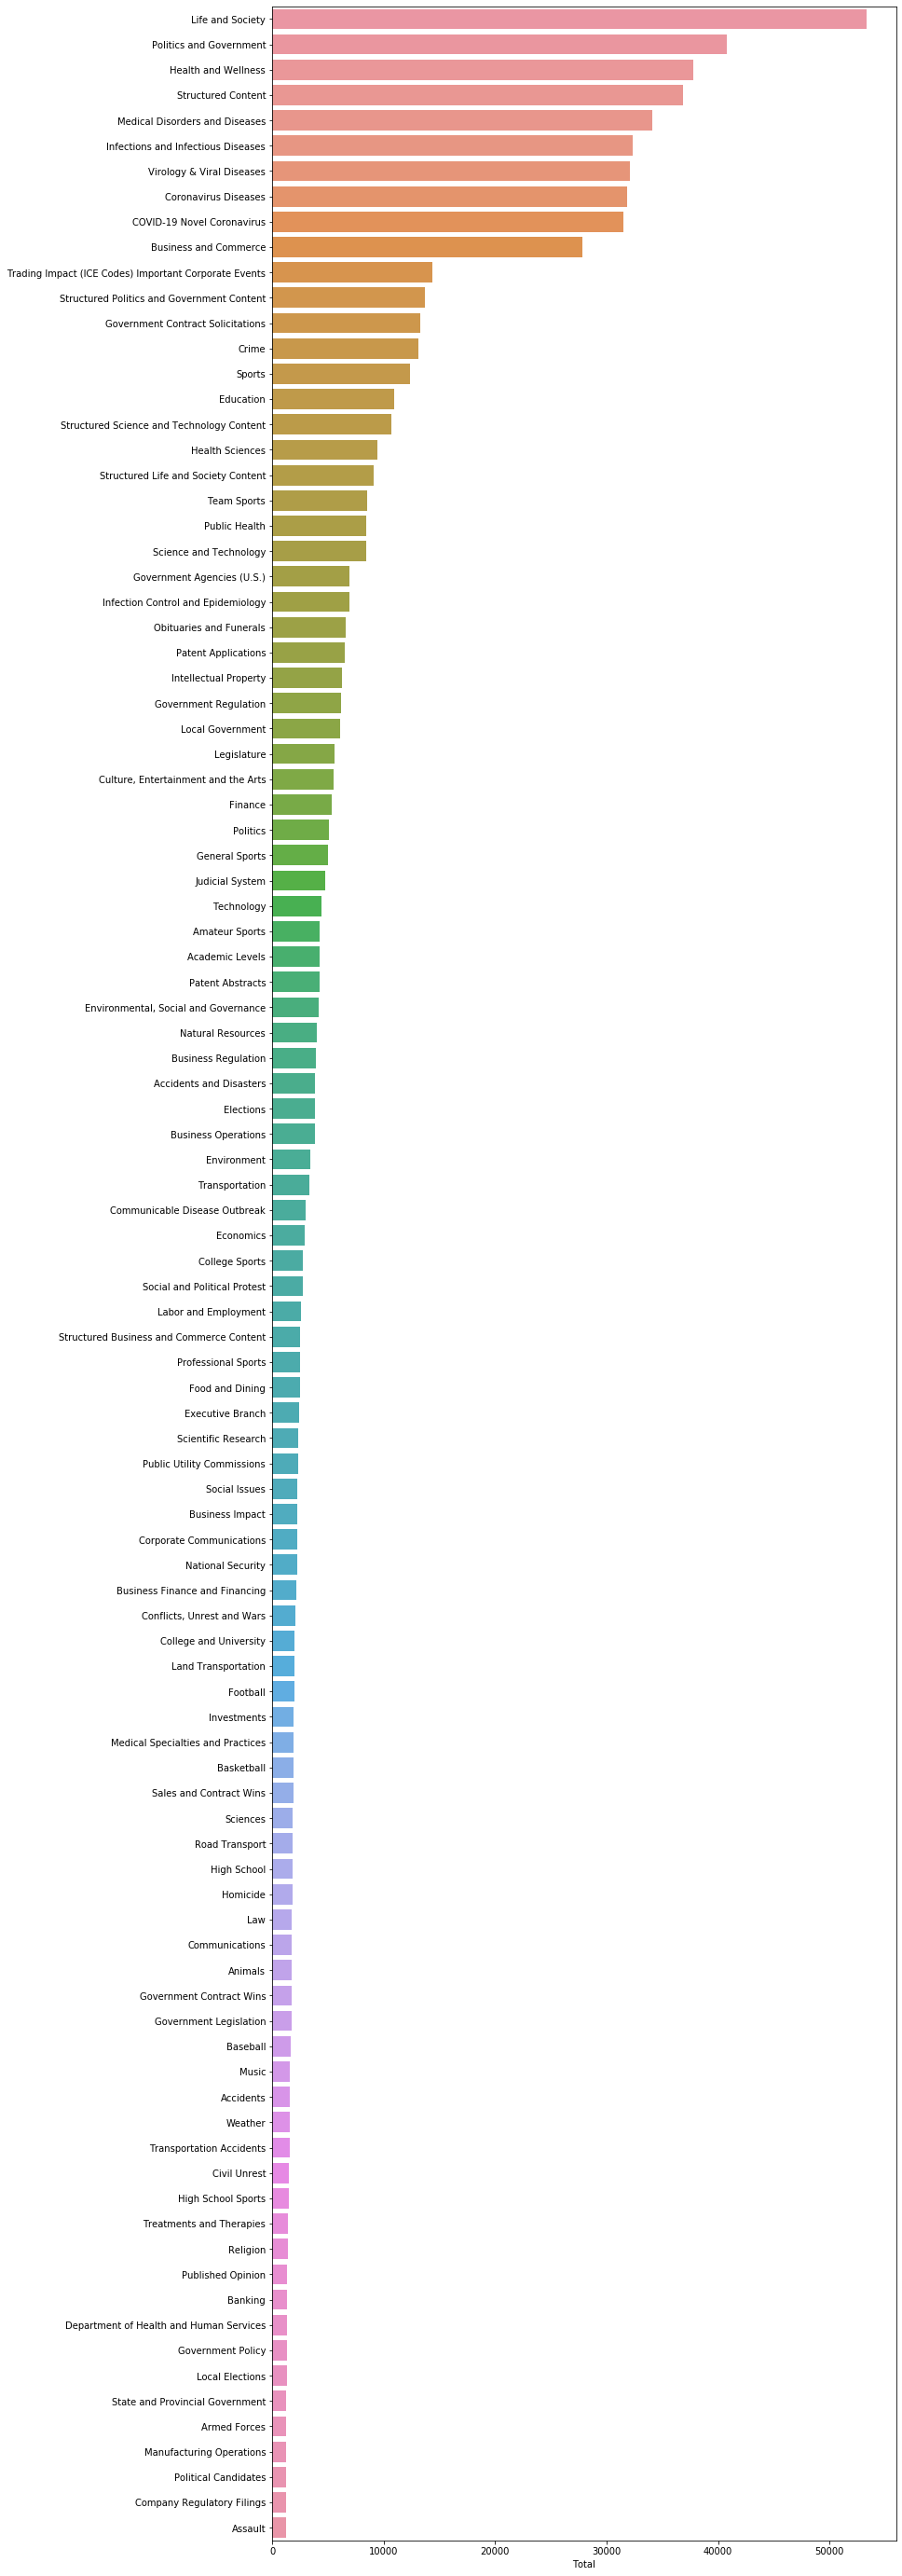

In [81]:
plt.figure(figsize=(12,50))
g=sns.barplot(y[:100],x_desc[:100],orient=0)

In [84]:
# Viewing top 500 entries

In [83]:
import plotly.express as px
fig = px.bar(y=x_desc[:500],x=y[:500], orientation='h',)
fig.show()

In [78]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [76]:
df_plot["Description"]=x_desc

In [79]:
df_plot

,Total,Description
term,,
lifesoc,53328.0,Life and Society
pol,40830.0,Politics and Government
haw,37774.0,Health and Wellness
spec,36833.0,Structured Content
haw.disease,34098.0,Medical Disorders and Diseases
haw.infectis,32365.0,Infections and Infectious Diseases
haw.virology,32095.0,Virology & Viral Diseases
haw.coronavi,31883.0,Coronavirus Diseases
haw.covid19,31473.0,COVID-19 Novel Coronavirus
